## Understanding weights of features

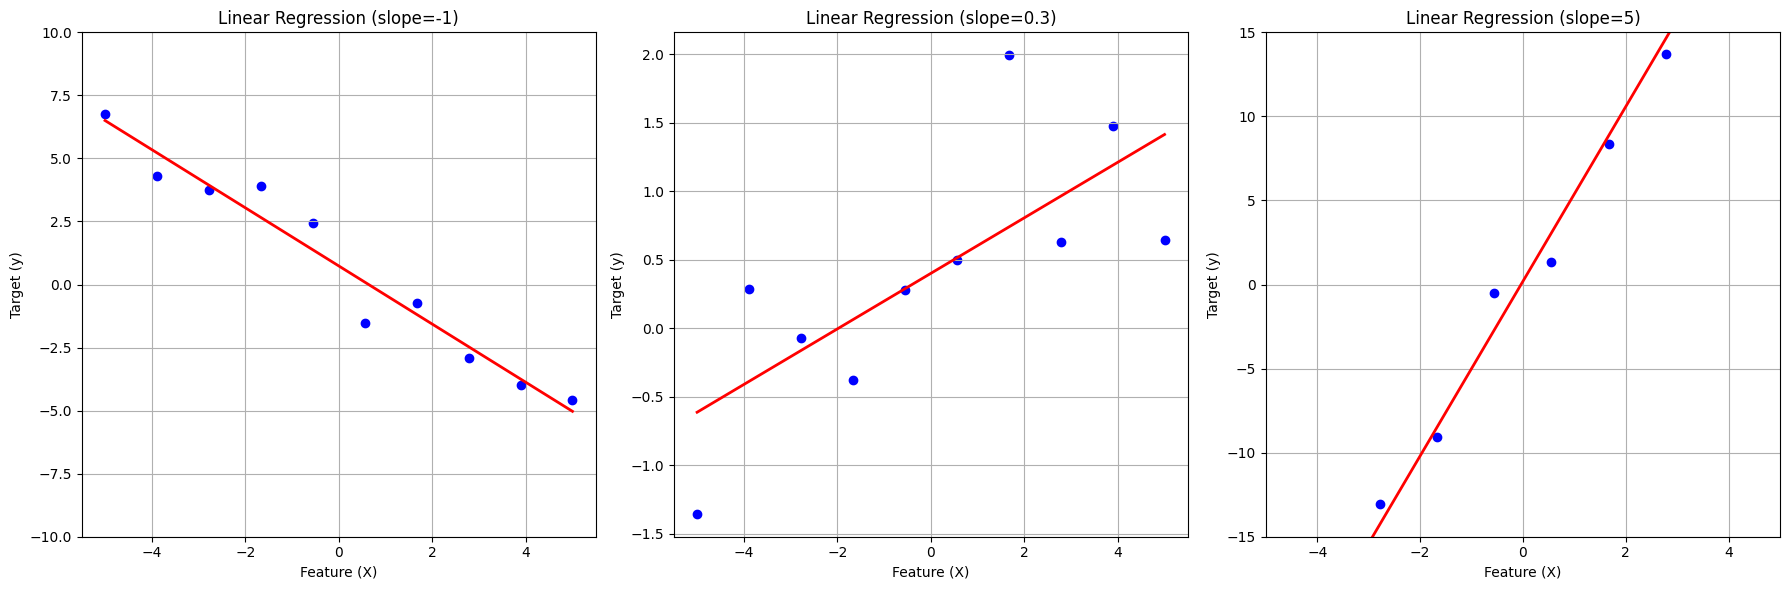

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Generating synthetic data
np.random.seed(0)
X = np.linspace(-5, 5, 10).reshape(-1, 1)  # 10 points

# Different slopes (weights)
slopes = [-1, 0.3, 5]

# 3 subplotes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, slope in enumerate(slopes):
    # Generating daya for y-axis with some noize
    y = slope * X.squeeze() + np.random.normal(0, 1, X.shape[0])

    # Fit linear regression model
    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    # Scatter plot
    axs[i].scatter(X, y, color='blue')

    # Linear plot
    axs[i].plot(X, y_pred, color='red', linewidth=2)

    # Adding Titles
    axs[i].set_title(f'Linear Regression (slope={slope})')
    axs[i].set_xlabel('Feature (X)')
    axs[i].set_ylabel('Target (y)')

    # Grid
    axs[i].grid(True)

    # Limits for  Y depending on a slope
    if slope == -1:
        axs[i].set_ylim([-10, 10])
    elif slope == 0.5:
        axs[i].set_ylim([-5, 5])
    elif slope == 5:
        axs[i].set_ylim([-15, 15])
        axs[i].set_xlim([-5, 5])

plt.tight_layout()

# Show plot
plt.show()




## Understanding overfitting

Mean Squared Error (Linear): 264.73
Mean Squared Error (Poly 9): 4.51
Mean Squared Error (Poly 2): 11.92


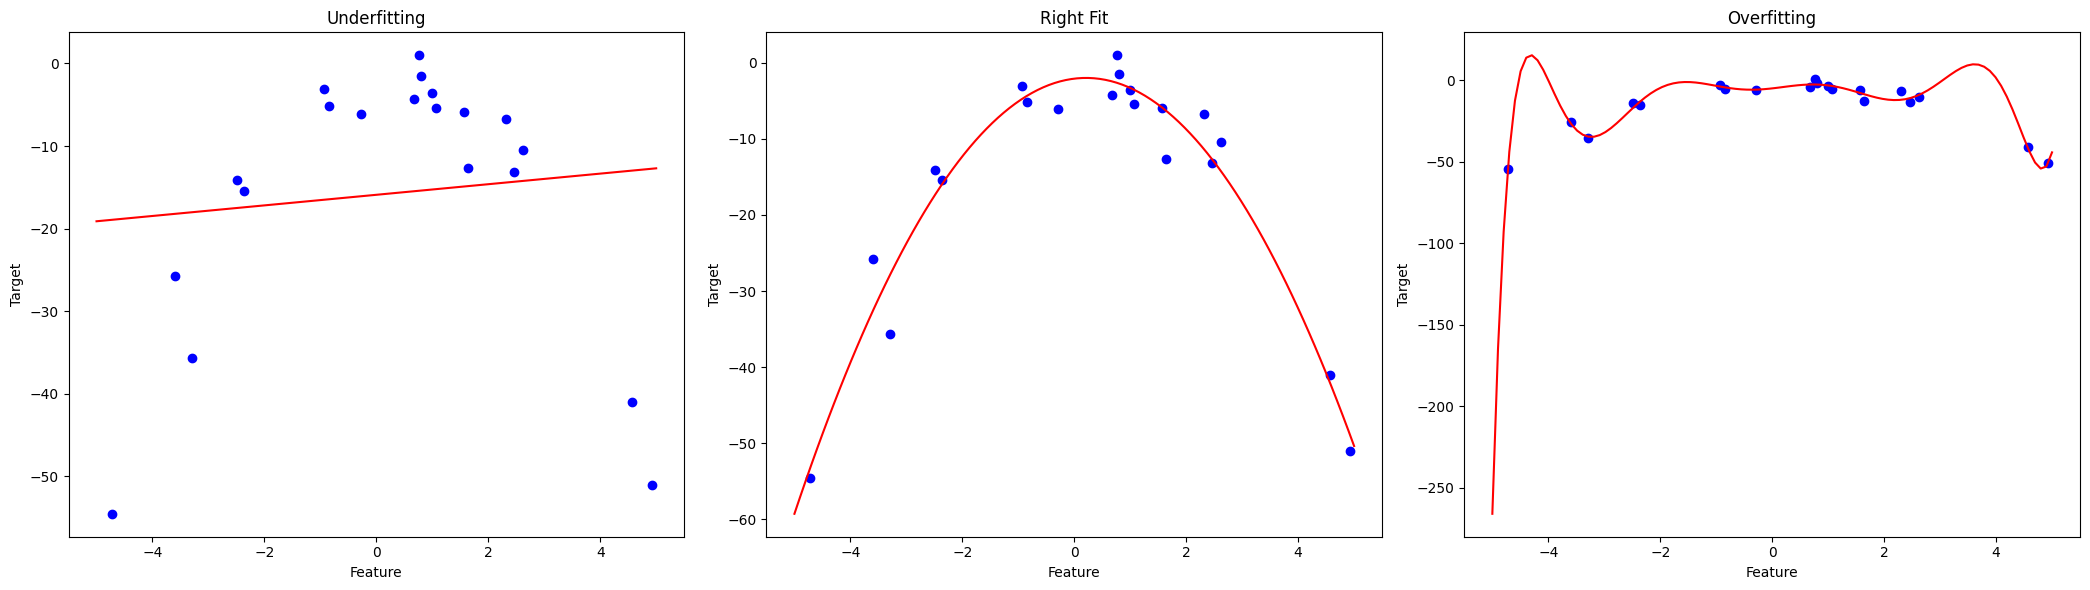

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 20)

X = X[:, np.newaxis]
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

# Fit linear regression model (underfitting)
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred_linear = linear_regressor.predict(X_test)

# Fit polynomial regression model (overfitting)
polynomial_features = PolynomialFeatures(degree=9)
X_poly = polynomial_features.fit_transform(X)
X_test_poly = polynomial_features.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)
y_pred_poly = poly_regressor.predict(X_test_poly)

# Fit polynomial regression model (right fit)
polynomial_features_right = PolynomialFeatures(degree=2)
X_poly_right = polynomial_features_right.fit_transform(X)
X_test_poly_right = polynomial_features_right.transform(X_test)

poly_regressor_right = LinearRegression()
poly_regressor_right.fit(X_poly_right, y)
y_pred_poly_right = poly_regressor_right.predict(X_test_poly_right)

# Calculate mean squared errors
mse_linear = mean_squared_error(y, linear_regressor.predict(X))
mse_poly = mean_squared_error(y, poly_regressor.predict(X_poly))
mse_poly_right = mean_squared_error(y, poly_regressor_right.predict(X_poly_right))

print(f'Mean Squared Error (Linear): {mse_linear:.2f}')
print(f'Mean Squared Error (Poly 9): {mse_poly:.2f}')
print(f'Mean Squared Error (Poly 2): {mse_poly_right:.2f}')

# Plotting the results
plt.figure(figsize=(21, 6))

# Linear regression (underfitting)
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred_linear, color='red')
plt.title("Underfitting")
plt.xlabel("Feature")
plt.ylabel("Target")

# Polynomial regression (overfitting)
plt.subplot(1, 3, 3)
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred_poly, color='red')
plt.title("Overfitting")
plt.xlabel("Feature")
plt.ylabel("Target")

# Polynomial regression (right fit)
plt.subplot(1, 3, 2)
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred_poly_right, color='red')
plt.title("Right Fit")
plt.xlabel("Feature")
plt.ylabel("Target")

plt.tight_layout()
plt.show()